In [162]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [163]:
#Call for Loading The Iris Dataset
iris = load_iris()


In [164]:
#Method For Splitting the data into 10% test and 90% train
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, random_state=42)

In [165]:
slen_X_train = X_train[:,0]
swid_X_train = X_train[:,1]
plen_X_train = X_train[:,2]
pwid_X_train = X_train[:,3]
slen_X_test = X_test[:,0]
swid_X_test = X_test[:,1]
plen_X_test = X_test[:,2]
pwid_X_test = X_test[:,3]

In [166]:
class LinearRegression:
    def __init__(self):
        self.w = None
        self.error = []
        self.l2_error = []

    def mean_squared(self, X, target):
        return np.mean((np.dot(X, self.w) - target) ** 2)

    def gradient_descent(self, X, y, alpha, epochs):
        self.w = np.random.uniform(-1, 1, (X.shape[1],))
        n = X.shape[0]
        for _ in range(epochs):
            predicted = np.dot(X, self.w)
            gradient = (2 / n) * np.dot(X.T, (predicted - y))
            self.w -= alpha * gradient
            error = self.mean_squared(X, y)
            self.error.append(error)

    def fit(self, X, y, alpha=0.01, epochs=100):
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        self.gradient_descent(X, y, alpha, epochs)

    def fit_l2(self, X, y, alpha=0.01, epochs=100, l=1):
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        n = X.shape[0]
        self.w = np.random.uniform(-1, 1, (X.shape[1],))
        for _ in range(epochs):
            predicted = np.dot(X, self.w)
            gradient = (2 / n) * np.dot(X.T, (predicted - y)) + (2 * l * self.w)
            self.w -= alpha * gradient

    def predict(self, X):
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        return np.dot(X, self.w[None].T)

def mean_squared(target, predicted):
    return np.mean((target - predicted) ** 2)


In [167]:
djs4331_model1 = LinearRegression()
X_train_reshaped = np.concatenate((np.ones((slen_X_train.shape[0], 1)), slen_X_train[:, np.newaxis]), axis=1)
djs4331_model1.fit(X_train_reshaped, swid_X_train, alpha=0.01, epochs=100)

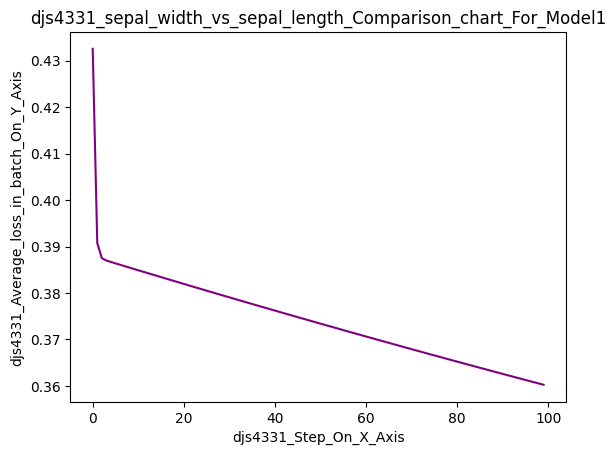

In [168]:
plt.plot(djs4331_model1.error,color='purple')
plt.title('djs4331_sepal_width_vs_sepal_length_Comparison_chart_For_Model1')
plt.xlabel('djs4331_Step_On_X_Axis')
plt.ylabel('djs4331_Average_loss_in_batch_On_Y_Axis')
plt.show()

In [169]:
predict1 = djs4331_model1.predict(np.concatenate((np.ones((slen_X_test.shape[0], 1)), slen_X_test[:, np.newaxis]), axis=1))
djs4331_model1_acc = mean_squared(swid_X_test, predict1)
print("Mean Squared Error:", djs4331_model1_acc)
print("Learned Weights:", djs4331_model1.w)



Mean Squared Error: 0.30096937862412537
Learned Weights: [ 0.56981024 -0.19792436  0.4509578 ]


In [170]:
djs4331_model1 = LinearRegression()
djs4331_model1.fit_l2(slen_X_train.reshape(-1, 1), swid_X_train, alpha=0.01, epochs=100, l=0.4)
with open('linear_regression_model1.pkl', 'wb') as f:
    pickle.dump(djs4331_model1, f)

# Load the model from file
with open('linear_regression_model1.pkl', 'rb') as f:
    djs4331_model1 = pickle.load(f)

# Use the loaded model for prediction
djs4331_predict1_l2 = djs4331_model1.predict(slen_X_test.reshape(-1, 1))
djs4331_model1_l2_acc = mean_squared(swid_X_test, djs4331_predict1_l2)
print("Mean Squared Error with L2 Regularization:", djs4331_model1_l2_acc)


Mean Squared Error with L2 Regularization: 0.2991182419179432


In [171]:
djs4331_model1.w

array([0.37557947, 0.4443892 ])

In [172]:
djs4331_model2 = LinearRegression()
djs4331_model2.fit(swid_X_train[:, np.newaxis], slen_X_train, alpha=0.01, epochs=100)
with open('linear_regression_model2.pkl', 'wb') as f:
    pickle.dump(djs4331_model2, f)

# Load the model from file
with open('linear_regression_model2.pkl', 'rb') as f:
    djs4331_model2 = pickle.load(f)

djs4331_predict2 = djs4331_model2.predict(swid_X_test[:, np.newaxis])
djs4331_model2_acc = mean_squared(slen_X_test, djs4331_predict2)
print("Mean Squared Error:", djs4331_model2_acc)


Mean Squared Error: 1.1487351482015278


In [173]:
djs4331_model3 = LinearRegression()
djs4331_model3.fit(slen_X_train[:, np.newaxis], plen_X_train, alpha=0.01, epochs=100)
with open('linear_regression_model3.pkl', 'wb') as f:
    pickle.dump(djs4331_model3, f)

# Load the model from file
with open('linear_regression_model3.pkl', 'rb') as f:
    djs4331_model3 = pickle.load(f)

djs4331_predict3 = djs4331_model3.predict(slen_X_test[:, np.newaxis])
djs4331_model3_acc = mean_squared(plen_X_test, djs4331_predict3)
print("Mean Squared Error:", djs4331_model3_acc)


Mean Squared Error: 3.724268867943381


In [174]:
djs4331_model4 = LinearRegression()
djs4331_model4.fit(slen_X_train[:, np.newaxis], pwid_X_train, alpha=0.01, epochs=100)
with open('linear_regression_model4.pkl', 'wb') as f:
    pickle.dump(djs4331_model4, f)

# Load the model from file
with open('linear_regression_model4.pkl', 'rb') as f:
    djs4331_model4 = pickle.load(f)

djs4331_predict4 = djs4331_model4.predict(slen_X_test[:, np.newaxis])
djs4331_model4_acc = mean_squared(pwid_X_test, djs4331_predict4)
print("Mean Squared Error:", djs4331_model4_acc)


Mean Squared Error: 0.6802909849283107


In [175]:
djs4331_model5 = LinearRegression()
djs4331_model5.fit(plen_X_train[:, np.newaxis], slen_X_train, alpha=0.01, epochs=100)
with open('linear_regression_model5.pkl', 'wb') as f:
    pickle.dump(djs4331_model5, f)

# Load the model from file
with open('linear_regression_model5.pkl', 'rb') as f:
    djs4331_model5 = pickle.load(f)
djs4331_predict5 =djs4331_model5.predict(plen_X_test[:, np.newaxis])
djs4331_model5_acc = mean_squared(slen_X_test, djs4331_predict5)
print("Mean Squared Error:", djs4331_model5_acc)


Mean Squared Error: 5.456266260417662


In [176]:
djs4331_model6 = LinearRegression()
djs4331_model6.fit(pwid_X_train[:, np.newaxis], slen_X_train, alpha=0.01, epochs=100)
with open('linear_regression_model6.pkl', 'wb') as f:
    pickle.dump(djs4331_model6, f)

# Load the model from file
with open('linear_regression_model6.pkl', 'rb') as f:
    djs4331_model6 = pickle.load(f)
djs4331_predict6 = djs4331_model6.predict(pwid_X_test[:, np.newaxis])
djs4331_model6_acc = mean_squared(slen_X_test, djs4331_predict6)
print("Mean Squared Error:", djs4331_model6_acc)


Mean Squared Error: 5.2399691693734285


In [177]:
djs4331_model7 = LinearRegression()
djs4331_model7.fit(swid_X_train[:, np.newaxis], plen_X_train, alpha=0.01, epochs=100)
with open('linear_regression_model7.pkl', 'wb') as f:
    pickle.dump(djs4331_model7, f)

# Load the model from file
with open('linear_regression_model7.pkl', 'rb') as f:
    djs4331_model7 = pickle.load(f)
djs4331_predict7 = djs4331_model7.predict(swid_X_test[:, np.newaxis])
djs4331_model7_acc = mean_squared(plen_X_test, djs4331_predict7)
print("Mean Squared Error:", djs4331_model7_acc)


Mean Squared Error: 3.368193525614504


In [178]:
djs4331_model8 = LinearRegression()
djs4331_model8.fit(swid_X_train[:, np.newaxis], pwid_X_train, alpha=0.01, epochs=100)
with open('linear_regression_model8.pkl', 'wb') as f:
    pickle.dump(djs4331_model8, f)

# Load the model from file
with open('linear_regression_model8.pkl', 'rb') as f:
    djs4331_model8 = pickle.load(f)
djs4331_predict8 = djs4331_model8.predict(swid_X_test[:, np.newaxis])
djs4331_model8_acc = mean_squared(pwid_X_test, djs4331_predict8)
print("Mean Squared Error:", djs4331_model8_acc)


Mean Squared Error: 0.5931281629357678


In [179]:
djs4331_model9 = LinearRegression()
djs4331_model9.fit(plen_X_train[:, np.newaxis], swid_X_train, alpha=0.01, epochs=100)
with open('linear_regression_model9.pkl', 'wb') as f:
    pickle.dump(djs4331_model9, f)

# Load the model from file
with open('linear_regression_model9.pkl', 'rb') as f:
    djs4331_model9 = pickle.load(f)
djs4331_predict9 = djs4331_model9.predict(plen_X_test[:, np.newaxis])
djs4331_model9_acc = mean_squared(swid_X_test, djs4331_predict9)
print("Mean Squared Error:", djs4331_model9_acc)


Mean Squared Error: 0.783419709176544


In [180]:
djs4331_model10 = LinearRegression()
djs4331_model10.fit(pwid_X_train[:, np.newaxis], swid_X_train, alpha=0.01, epochs=100)
with open('linear_regression_model10.pkl', 'wb') as f:
    pickle.dump(djs4331_model10, f)

# Load the model from file
with open('linear_regression_model10.pkl', 'rb') as f:
    djs4331_model10 = pickle.load(f)
djs4331_predict10 = djs4331_model10.predict(pwid_X_test[:, np.newaxis])
djs4331_model10_acc = mean_squared(swid_X_test, djs4331_predict10)
print("Mean Squared Error:", djs4331_model10_acc)


Mean Squared Error: 1.199529122824537


In [181]:
djs4331_model11 = LinearRegression()
djs4331_model11.fit(plen_X_train[:, np.newaxis], pwid_X_train, alpha=0.01, epochs=100)
with open('linear_regression_model11.pkl', 'wb') as f:
    pickle.dump(djs4331_model11, f)

# Load the model from file
with open('linear_regression_model11.pkl', 'rb') as f:
    djs4331_model11 = pickle.load(f)
djs4331_predict11 = djs4331_model11.predict(plen_X_test[:, np.newaxis])
djs4331_model11_acc = mean_squared(pwid_X_test, djs4331_predict11)
print("Mean Squared Error:", djs4331_model11_acc)


Mean Squared Error: 1.3047567219918847


In [182]:
djs4331_model12 = LinearRegression()
djs4331_model12.fit(pwid_X_train[:, np.newaxis], plen_X_train, alpha=0.01, epochs=100)
with open('linear_regression_model12.pkl', 'wb') as f:
    pickle.dump(djs4331_model12, f)

# Load the model from file
with open('linear_regression_model12.pkl', 'rb') as f:
    djs4331_model12 = pickle.load(f)
djs4331_predict12 = djs4331_model12.predict(pwid_X_train[:, np.newaxis])
djs4331_model12_acc = mean_squared(plen_X_train, djs4331_predict12)
print("Mean Squared Error:", djs4331_model12_acc)


Mean Squared Error: 6.509620577261251


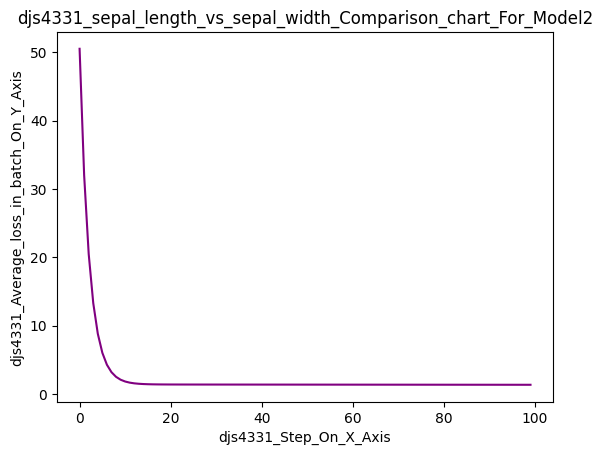

In [183]:
plt.plot(djs4331_model2.error,color='purple')
plt.title('djs4331_sepal_length_vs_sepal_width_Comparison_chart_For_Model2')
plt.xlabel('djs4331_Step_On_X_Axis')
plt.ylabel('djs4331_Average_loss_in_batch_On_Y_Axis')
plt.show()

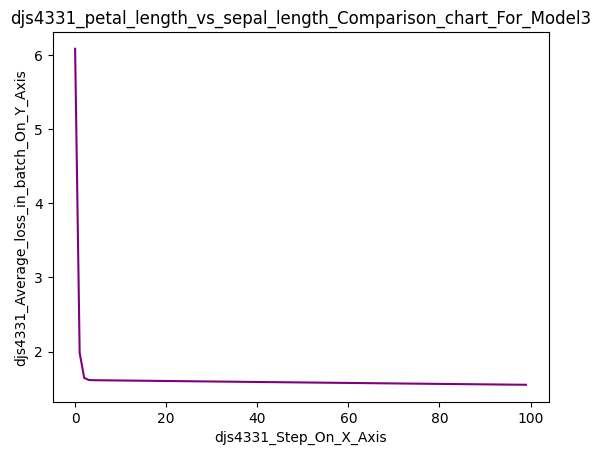

In [191]:
plt.plot(djs4331_model3.error,color='purple')
plt.title('djs4331_petal_length_vs_sepal_length_Comparison_chart_For_Model3')
plt.xlabel('djs4331_Step_On_X_Axis')
plt.ylabel('djs4331_Average_loss_in_batch_On_Y_Axis')
plt.show()

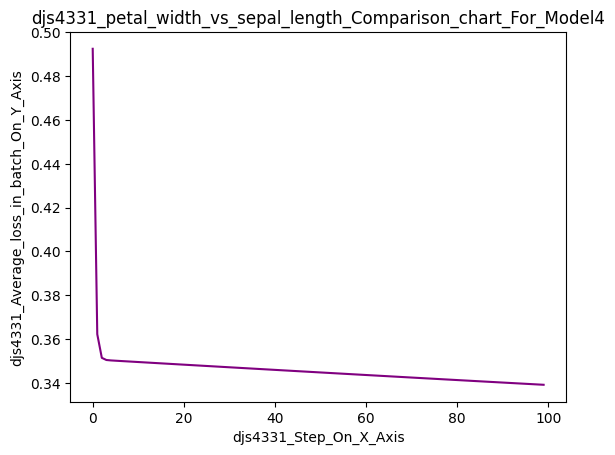

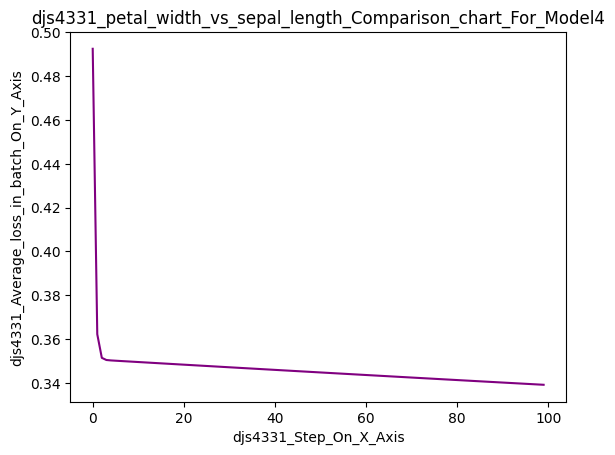

In [192]:
plt.plot(djs4331_model4.error,color='purple')
plt.title('djs4331_petal_width_vs_sepal_length_Comparison_chart_For_Model4')
plt.xlabel('djs4331_Step_On_X_Axis')
plt.ylabel('djs4331_Average_loss_in_batch_On_Y_Axis')
plt.show()

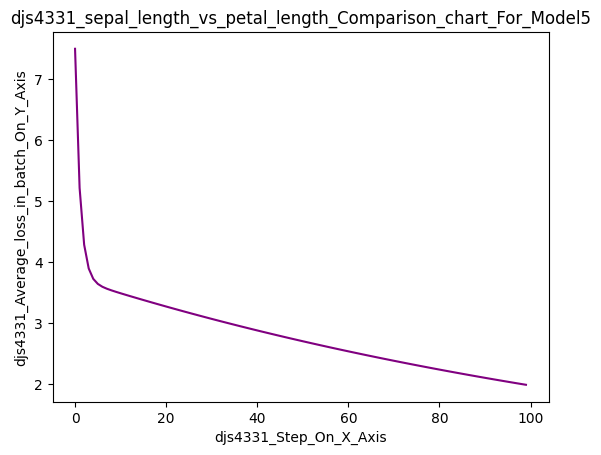

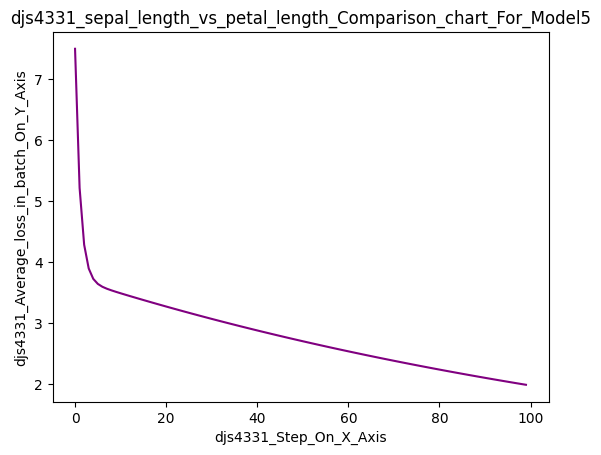

In [193]:
plt.plot(djs4331_model5.error,color='purple')
plt.title('djs4331_sepal_length_vs_petal_length_Comparison_chart_For_Model5')
plt.xlabel('djs4331_Step_On_X_Axis')
plt.ylabel('djs4331_Average_loss_in_batch_On_Y_Axis')
plt.show()

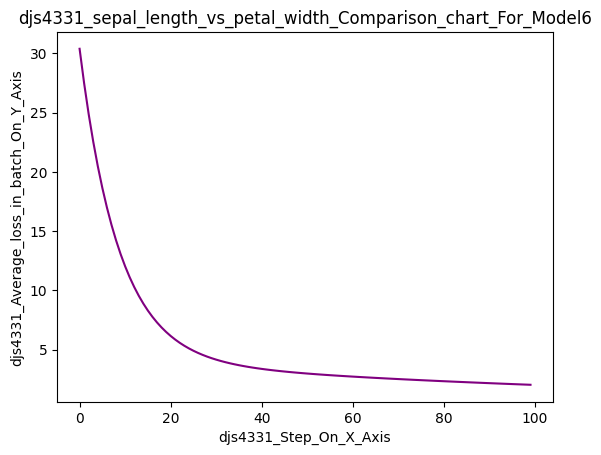

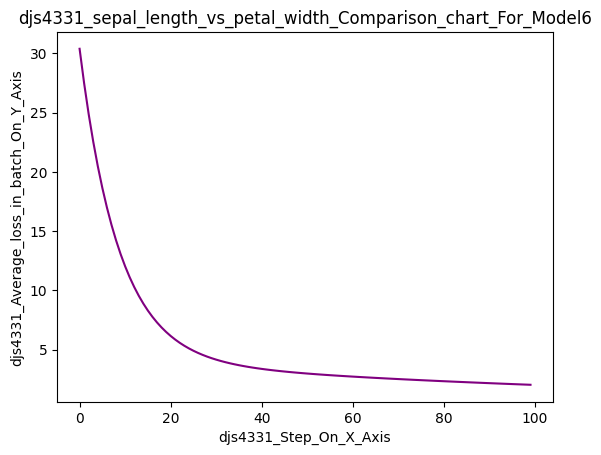

In [194]:
plt.plot(djs4331_model6.error,color='purple')
plt.title('djs4331_sepal_length_vs_petal_width_Comparison_chart_For_Model6')
plt.xlabel('djs4331_Step_On_X_Axis')
plt.ylabel('djs4331_Average_loss_in_batch_On_Y_Axis')
plt.show()

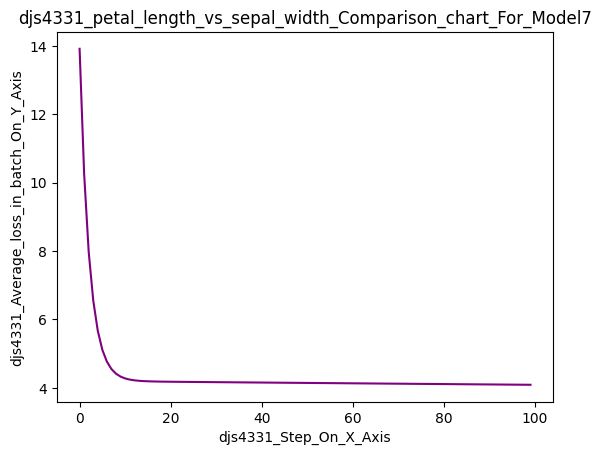

In [187]:
plt.plot(djs4331_model7.error,color='purple')
plt.title('djs4331_petal_length_vs_sepal_width_Comparison_chart_For_Model7')
plt.xlabel('djs4331_Step_On_X_Axis')
plt.ylabel('djs4331_Average_loss_in_batch_On_Y_Axis')
plt.show()

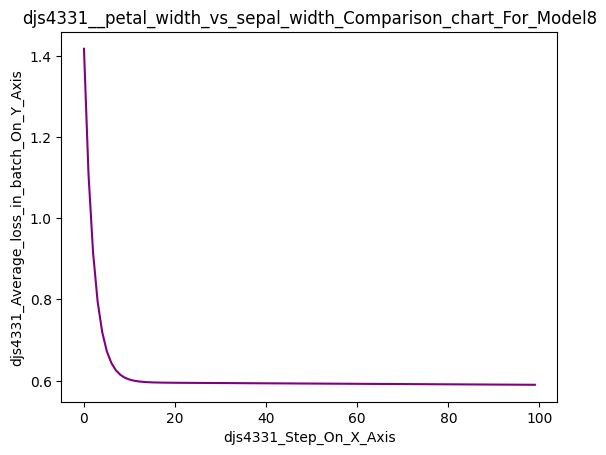

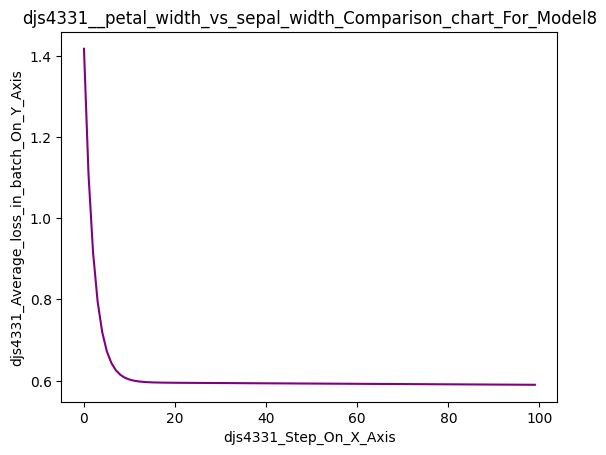

In [195]:
plt.plot(djs4331_model8.error,color='purple')
plt.title('djs4331__petal_width_vs_sepal_width_Comparison_chart_For_Model8')
plt.xlabel('djs4331_Step_On_X_Axis')
plt.ylabel('djs4331_Average_loss_in_batch_On_Y_Axis')
plt.show()

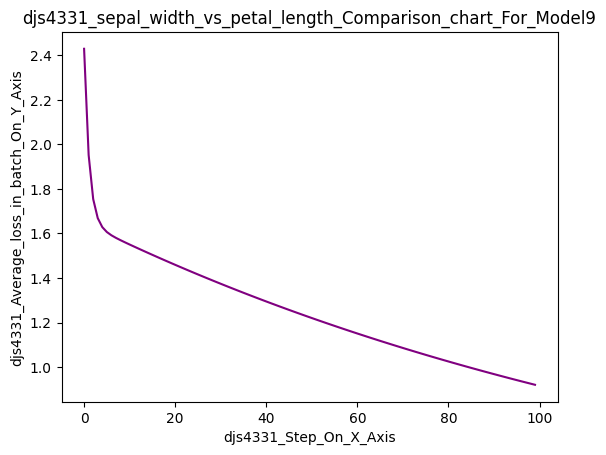

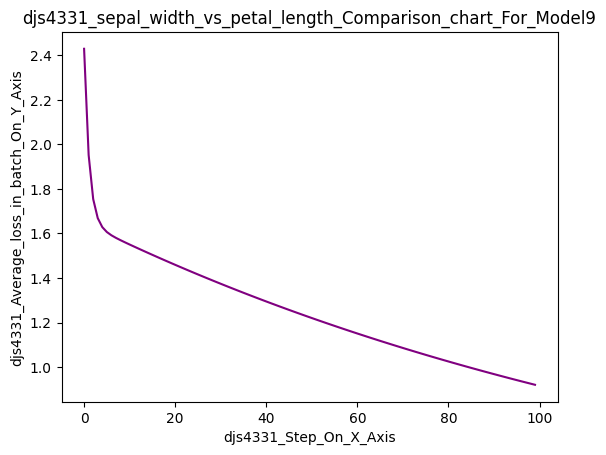

In [196]:
plt.plot(djs4331_model9.error,color='purple')
plt.title('djs4331_sepal_width_vs_petal_length_Comparison_chart_For_Model9')
plt.xlabel('djs4331_Step_On_X_Axis')
plt.ylabel('djs4331_Average_loss_in_batch_On_Y_Axis')
plt.show()

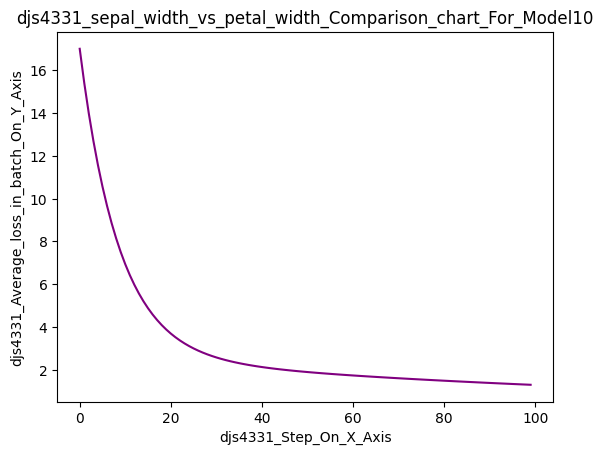

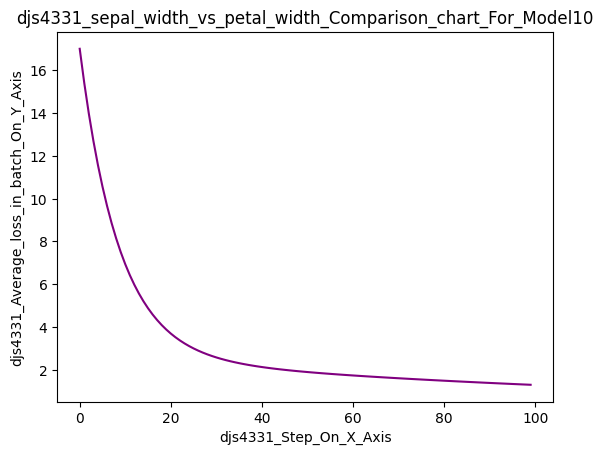

In [197]:
plt.plot(djs4331_model10.error,color='purple')
plt.title('djs4331_sepal_width_vs_petal_width_Comparison_chart_For_Model10')
plt.xlabel('djs4331_Step_On_X_Axis')
plt.ylabel('djs4331_Average_loss_in_batch_On_Y_Axis')
plt.show()

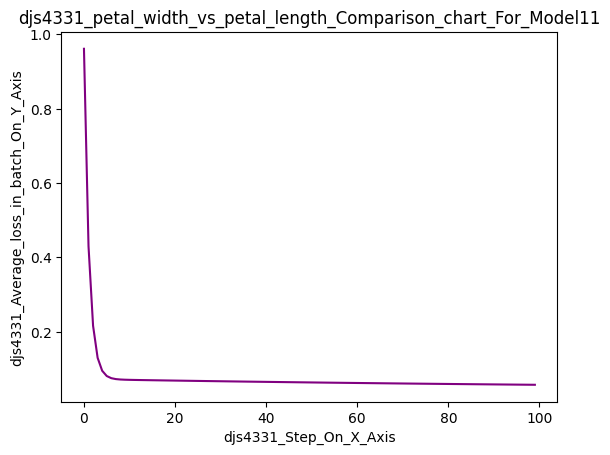

In [198]:
plt.plot(djs4331_model11.error,color='purple')
plt.title('djs4331_petal_width_vs_petal_length_Comparison_chart_For_Model11')
plt.xlabel('djs4331_Step_On_X_Axis')
plt.ylabel('djs4331_Average_loss_in_batch_On_Y_Axis')
plt.show()

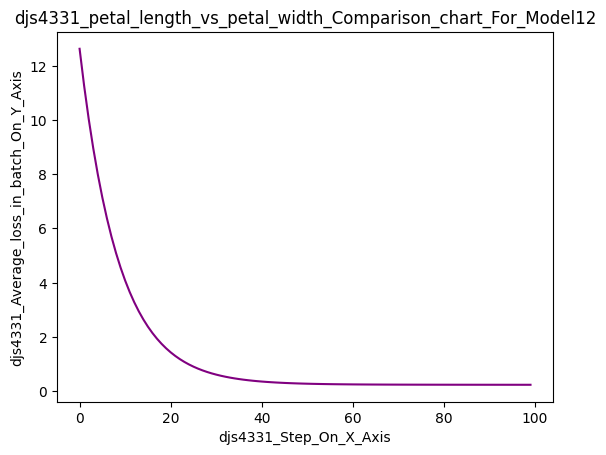

In [161]:
plt.plot(djs4331_model12.error,color='purple')
plt.title('djs4331_petal_length_vs_petal_width_Comparison_chart_For_Model12')
plt.xlabel('djs4331_Step_On_X_Axis')
plt.ylabel('djs4331_Average_loss_in_batch_On_Y_Axis')
plt.show()